In [106]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

In [117]:
DATA_ROOT = Path("~/data/entsoe").expanduser()
COUNTRY = "FR"
YEAR = "2023"
FEATURE = "load"
CSV_FILE_PATH = DATA_ROOT / COUNTRY / YEAR / f"{FEATURE}_{COUNTRY}_{YEAR}.csv"

In [118]:
df = pd.read_csv(CSV_FILE_PATH)
print(df.columns)
df = df.rename(columns={df.columns[0]: "ds"})
if FEATURE != "generation":
    df = df.rename(columns={df.columns[1]: FEATURE})
df["ds"] = pd.to_datetime(df["ds"]).dt.tz_localize(None)

Index(['Unnamed: 0', 'Load'], dtype='object')


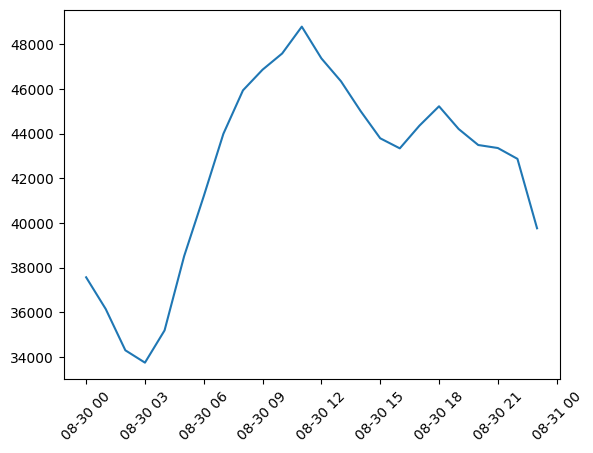

In [119]:
ds_range = pd.date_range(start="30/08/2023", periods=24, freq="h")
df_day = df[df["ds"].isin(ds_range)]

plt.plot(df_day["ds"], df_day[FEATURE])
plt.xticks(rotation=45)
plt.show()

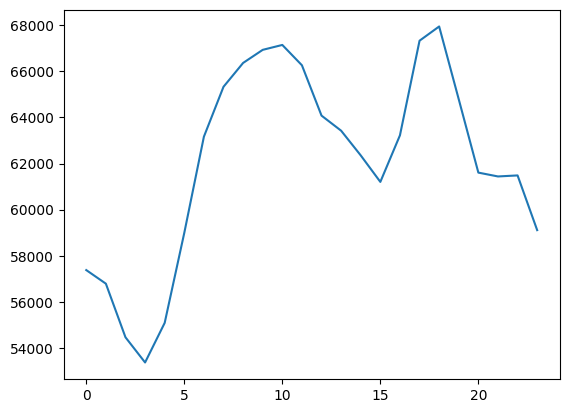

In [120]:
df_jan = df[df["ds"].dt.month == 1].copy()
df_jan["hour"] = df_jan["ds"].dt.hour
mean_load_per_hour = df_jan.groupby("hour")[FEATURE].mean().reset_index()
plt.plot(mean_load_per_hour["hour"], mean_load_per_hour[FEATURE])

In [121]:
df_jan

,ds,load,hour
0,2023-01-01 00:00:00,45709.0,0
1,2023-01-01 01:00:00,44640.0,1
2,2023-01-01 02:00:00,41533.0,2
3,2023-01-01 03:00:00,39248.0,3
4,2023-01-01 04:00:00,38389.0,4
...,...,...,...
739,2023-01-31 19:00:00,67007.0,19
740,2023-01-31 20:00:00,63647.0,20
741,2023-01-31 21:00:00,63371.0,21
742,2023-01-31 22:00:00,63424.0,22
